In [15]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
from pathlib import Path
import sys

# print("this path is on fire",os.getenv("PYTHONPATH", "${workspaceFolder}"))

# print("the python paths are")
import sys
import os

root = Path().resolve().absolute().parent.parent
sys.path.append(str(root))
print(root)
from utils.data_loader import DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/matsalexander/Desktop/kdd-process/src


Analyzing dataset: with target CLASS
Dataset Shape: (3672, 87)


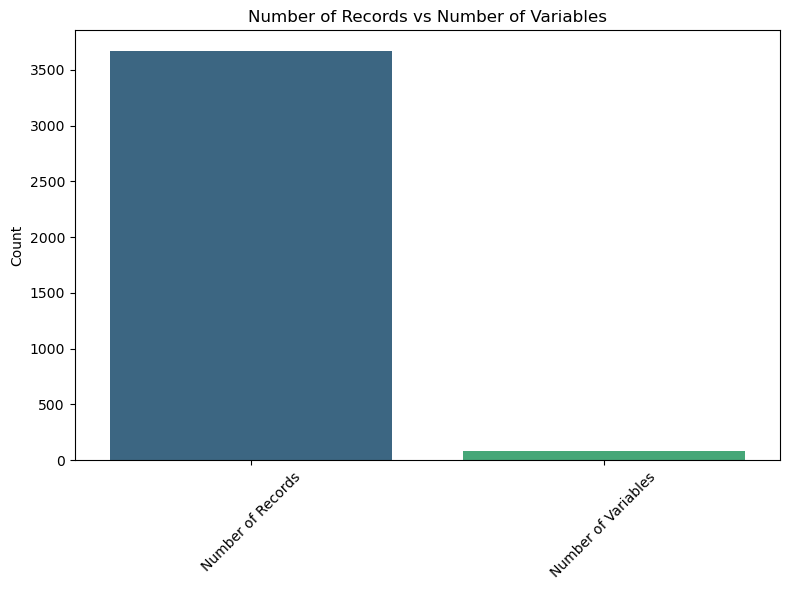

Saved plot: images/stroke_records_variables.png
No missing values found in the dataset.

Variable Types:
{'numeric': ['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'], 'binary': ['CLASS'], 'date': [], 'symbolic': []}


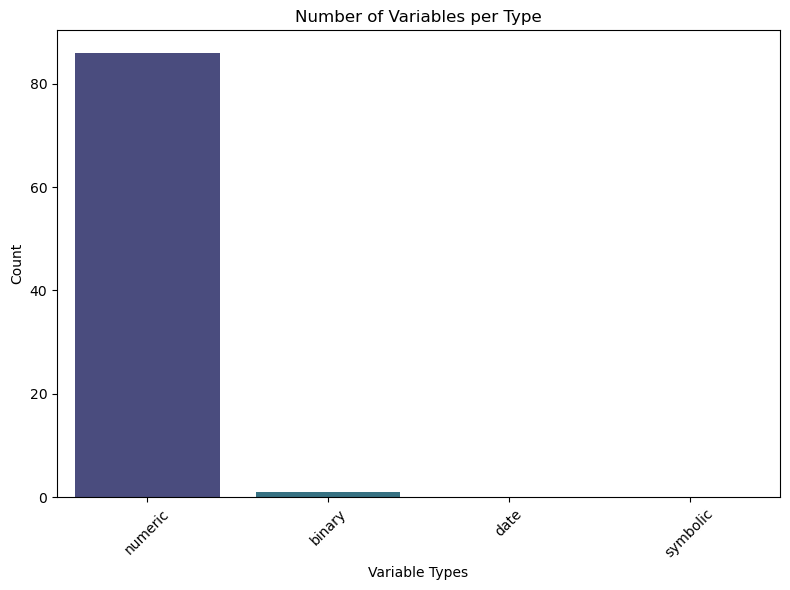

Saved plot: images/stroke_variable_types.png

No symbolic variables to convert.

Updated Data Types:
Company                 int64
Time                    int64
Financial Distress    float64
CLASS                    bool
x1                    float64
                       ...   
x79                   float64
x80                     int64
x81                   float64
x82                     int64
x83                     int64
Length: 87, dtype: object

Summary:
- Total Records: 3672
- Total Variables: 87
- Missing Values per Variable: None
- Variable Types: {'numeric': 86, 'binary': 1, 'date': 0, 'symbolic': 0}

––––––––––––––––––––––––––––––––––––––––––



Analyzing dataset: with target CLASS__security
Dataset Shape: (100000, 19)


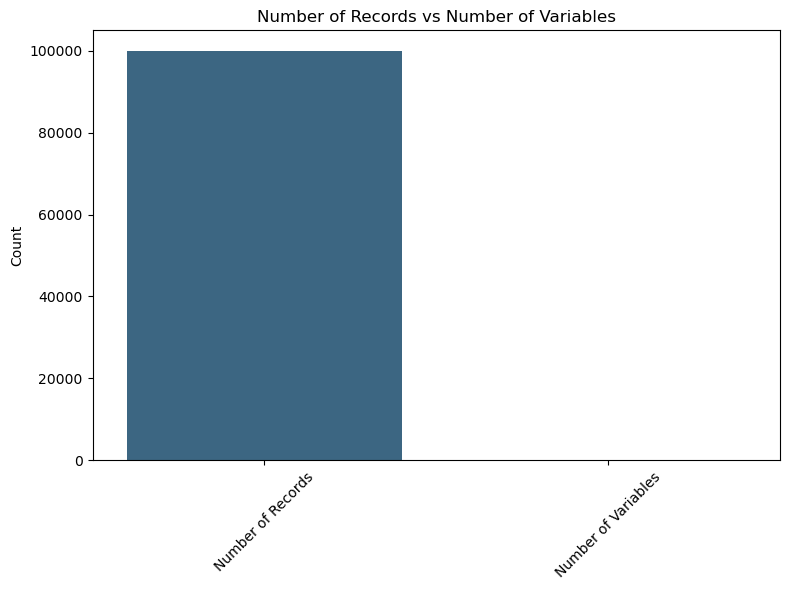

Saved plot: images/stroke_records_variables.png


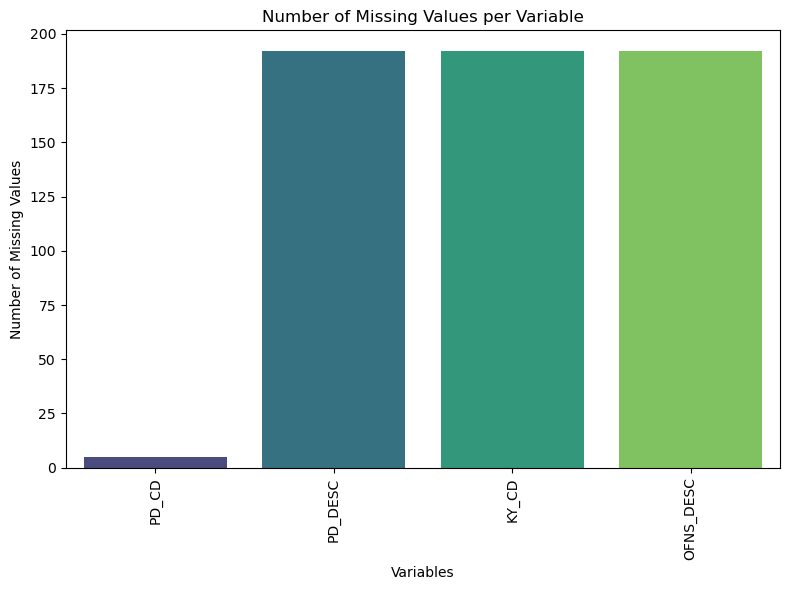

Saved plot: images/stroke_mv.png

Variable Types:
{'numeric': ['ARREST_KEY', 'PD_CD', 'KY_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude'], 'binary': ['LAW_CAT_CD', 'PERP_SEX', 'CLASS__security'], 'date': ['ARREST_DATE'], 'symbolic': ['PD_DESC', 'OFNS_DESC', 'LAW_CODE', 'ARREST_BORO', 'AGE_GROUP', 'PERP_RACE']}


/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_18236/1575281538.py:111: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors="raise")
/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_18236/1575281538.py:111: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors="raise")
/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_18236/1575281538.py:111: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = to_datetime(df[c], errors="raise")
/var/folders/b0/slnc__2x31jczblnsfgfmjw00000gn/T/ipykernel_18

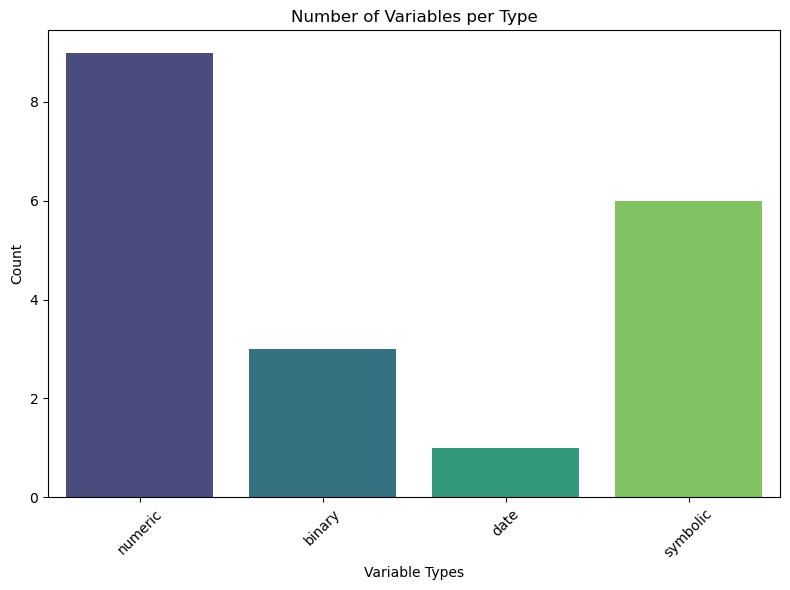

Saved plot: images/stroke_variable_types.png

Converted Symbolic Variables to 'category' dtype:
PD_DESC        category
OFNS_DESC      category
LAW_CODE       category
ARREST_BORO    category
AGE_GROUP      category
PERP_RACE      category
dtype: object

Updated Data Types:
ARREST_KEY                    int64
ARREST_DATE          datetime64[ns]
PD_CD                       float64
PD_DESC                    category
KY_CD                       float64
OFNS_DESC                  category
LAW_CODE                   category
LAW_CAT_CD                     bool
ARREST_BORO                category
ARREST_PRECINCT               int64
JURISDICTION_CODE           float64
AGE_GROUP                  category
PERP_SEX                       bool
PERP_RACE                  category
X_COORD_CD                  float64
Y_COORD_CD                  float64
Latitude                    float64
Longitude                   float64
CLASS__security                bool
dtype: object

Summary:
- Total Records: 

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series, read_csv, to_numeric, to_datetime
from matplotlib.pyplot import figure, savefig, show

# Ensure that the 'images' directory exists
images_dir = "images"
os.makedirs(images_dir, exist_ok=True)



def analyze_dataset(data: DataFrame, file_tag: str, images_dir: str) -> None:
    # Display the shape of the dataset
    print("Dataset Shape:", data.shape)  # Expected Output: (5110, 11)

    # ---------------------------
    # 1. Number of Records vs Variables
    # ---------------------------

    def plot_bar_chart(x_labels, y_values, title="", xlabel="", ylabel="", rotation=45):
        """
        Utility function to plot a bar chart.
        """
        plt.figure(figsize=(8, 6))
        sns.barplot(x=x_labels, y=y_values, hue=x_labels, palette="viridis", legend=False)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(rotation=rotation)
        plt.tight_layout()

    # Prepare data for the bar chart
    values: dict[str, int] = {
        "Number of Records": data.shape[0],
        "Number of Variables": data.shape[1]
    }

    # Plot and save the bar chart
    plot_bar_chart(
        list(values.keys()),
        list(values.values()),
        title="Number of Records vs Number of Variables",
        xlabel="",
        ylabel="Count"
    )
    savefig(os.path.join(images_dir, f"{file_tag}_records_variables.png"))
    show()
    print("Saved plot: images/stroke_records_variables.png")

    # ---------------------------
    # 2. Missing Values per Variable
    # ---------------------------

    # Calculate missing values per variable
    mv: dict[str, int] = {}
    for var in data.columns:
        nr: int = data[var].isna().sum()
        if nr > 0:
            mv[var] = nr

    # Plot and save the missing values bar chart
    if mv:
        plot_bar_chart(
            list(mv.keys()),
            list(mv.values()),
            title="Number of Missing Values per Variable",
            xlabel="Variables",
            ylabel="Number of Missing Values",
            rotation=90
        )
        savefig(os.path.join(images_dir, f"{file_tag}_mv.png"))
        show()
        print("Saved plot: images/stroke_mv.png")
    else:
        print("No missing values found in the dataset.")

    # ---------------------------
    # 3. Determine Variable Types
    # ---------------------------

    def get_variable_types(df: DataFrame) -> dict[str, list]:
        """
        Categorize variables into numeric, binary, date, and symbolic types.
        
        Parameters:
        - df: pandas DataFrame to analyze.
        
        Returns:
        - Dictionary with keys 'numeric', 'binary', 'date', 'symbolic' and lists of column names as values.
        """
        variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

        nr_values: Series = df.nunique(axis=0, dropna=True)
        for c in df.columns:
            if nr_values[c] == 2:
                variable_types["binary"].append(c)
                try:
                    df[c] = df[c].astype("bool")
                except ValueError:
                    # If conversion to bool fails, keep it as is
                    print(f"Warning: Could not convert '{c}' to bool.")
            else:
                try:
                    to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

        return variable_types

    # Get variable types
    variable_types: dict[str, list] = get_variable_types(data)
    print("\nVariable Types:")
    print(variable_types)

    # Count the number of variables per type
    counts: dict[str, int] = {tp: len(cols) for tp, cols in variable_types.items()}

    # Plot and save the variable types bar chart
    plot_bar_chart(
        list(counts.keys()),
        list(counts.values()),
        title="Number of Variables per Type",
        xlabel="Variable Types",
        ylabel="Count"
    )
    savefig(os.path.join(images_dir, f"{file_tag}_variable_types.png"))
    show()
    print("Saved plot: images/stroke_variable_types.png")

    # ---------------------------
    # 4. Convert Symbolic Variables to Categorical
    # ---------------------------

    symbolic: list[str] = variable_types.get("symbolic", [])
    if symbolic:
        data[symbolic] = data[symbolic].apply(lambda x: x.astype("category"))
        print("\nConverted Symbolic Variables to 'category' dtype:")
        print(data[symbolic].dtypes)
    else:
        print("\nNo symbolic variables to convert.")

    # ---------------------------
    # 5. Display Updated Data Types
    # ---------------------------

    print("\nUpdated Data Types:")
    print(data.dtypes)

    # ---------------------------
    # 6. Summary
    # ---------------------------

    print("\nSummary:")
    print(f"- Total Records: {data.shape[0]}")
    print(f"- Total Variables: {data.shape[1]}")
    print(f"- Missing Values per Variable: {mv if mv else 'None'}")
    print(f"- Variable Types: {counts}")
    # done
    print("\n––––––––––––––––––––––––––––––––––––––––––\n")


my_load = DataLoader()
datasets_and_targets=[
    my_load.get_econmical_classification_dataset_and_target(),
    my_load.get_security_classification_dataset_and_target(sample_size=100000),
]

for dataset, target in datasets_and_targets:
    print(f"Analyzing dataset: with target {target}")
    analyze_dataset(dataset, target, images_dir)
    print("\n")